In [79]:
'''
https://github.com/bbmusa
'''
from pandas_datareader import data as pdr
from yahoo_fin import stock_info as si

In [2]:
import pandas as pd

In [3]:
import numpy as np

In [7]:
tickers = si.tickers_nifty50()

In [17]:
tickers.remove('MM.NS')

In [72]:
start_date = '2021-11-10'
end_date = '2022-02-14'

In [73]:
'''
J. Welles Wilder'RSI, Indicator simply find blue chip gold mines for you.
'''
def download_all_stock_data(all_stock_symbols, start_date, end_date):
    def download_stock_data(single_symbol):
        print(' Downloading '+single_symbol+' data ')
#       try:
        tmp1=pdr.get_data_yahoo(single_symbol,start=start_date,end=end_date)
#       except KeyError:
#            pass 
        return(tmp1)
    downloaded_data=map(download_stock_data,all_stock_symbols)
    return(pd.concat(downloaded_data,keys=all_stock_symbols, names=['Ticker','Date']))        


In [74]:
stock_data=download_all_stock_data(tickers, start_date, end_date)
fileName = 'downloadedData.pkl'
stock_data.to_pickle(fileName)

In [80]:
'''
RSI = 100-{100/(1+RS)}
RS= Average gain/Average Loss

This rsi is based on 14 periods which means:
+ first avrage gain = sum of gains over the 14 periods / 14
+ first avrage loss = sum of loss over the 14 periods / 14
'''

def compute_RSI(data,period_RSI):
     
    differencePrice = data['Close'].diff()
    differencePriceValues=differencePrice.values
 
    positive_differences=0
    negative_differences=0
    current_average_positive=0
    current_average_negative=0
    price_index=0
    RSI=[]
 
     
    for difference in differencePriceValues[1:]:
     
        if difference>0:
            positive_difference=difference
            negative_difference=0                
        if difference<0:
            negative_difference=np.abs(difference)
            positive_difference=0
        if difference==0:
            negative_difference=0
            positive_difference=0
            
        if (price_index<period_RSI):
         
            current_average_positive=current_average_positive+(1/period_RSI)*positive_difference
            current_average_negative=current_average_negative+(1/period_RSI)*negative_difference
               
            if(price_index==(period_RSI-1)):
                if current_average_negative!=0:
                    RSI.append(100 - 100/(1+(current_average_positive/current_average_negative)))           
                else:
                    RSI.append(100)       
        else:
         
            current_average_positive=((period_RSI-1)*current_average_positive+positive_difference)/(period_RSI)
            current_average_negative=((period_RSI-1)*current_average_negative+negative_difference)/(period_RSI)
            if current_average_negative!=0:
                RSI.append(100 - 100/(1+(current_average_positive/current_average_negative)))   
            else:
                RSI.append(100)
             
        price_index=price_index+1    
 
     
    RSI_series=pd.Series(data=RSI,index=differencePrice.index[period_RSI:])
    return(RSI_series)

/tmp/ipykernel_40539/1017764305.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  RSI_all_ticker=pd.Series(index=tickers)


<AxesSubplot:>

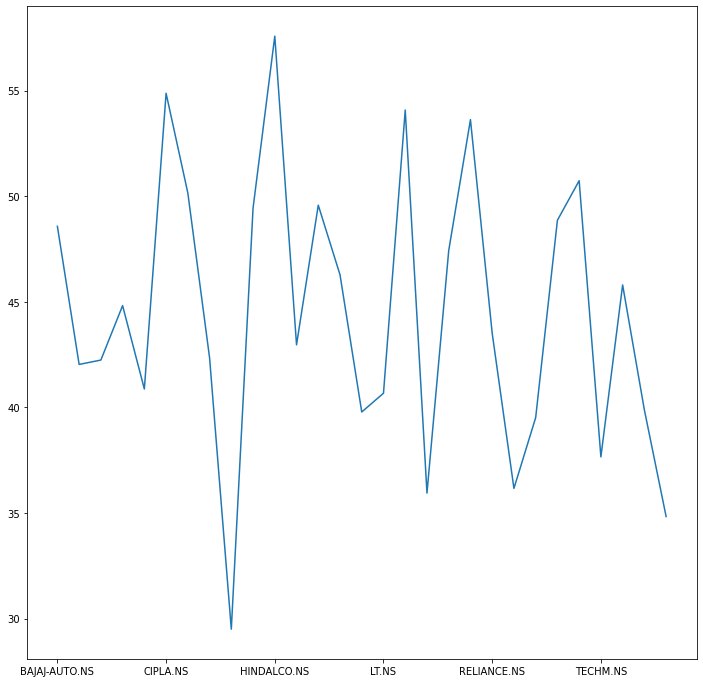

In [76]:
RSI_all_ticker=pd.Series(index=tickers)
 
for stock_symbol in tickers:
    test1=compute_RSI(stock_data.loc[stock_symbol],28)
    RSI_all_ticker.loc[stock_symbol]=test1[-1]
     
RSI_all_ticker.plot(figsize=(12,12))

In [77]:
RSI_all_ticker.idxmin()


'HDFCLIFE.NS'

In [78]:
'''
we consider A perticular stock is overbought if RSI above 70 and 
over sold below 30

generally people takes RSI<40 as a Rocket
'''
RSI_all_ticker.nsmallest(80)

HDFCLIFE.NS      29.496021
WIPRO.NS         34.831050
NESTLEIND.NS     35.940454
SHREECEM.NS      36.162869
TECHM.NS         37.656497
TATACONSUM.NS    39.514315
KOTAKBANK.NS     39.781453
ULTRACEMCO.NS    39.879487
LT.NS            40.671373
BRITANNIA.NS     40.870485
BAJAJFINSV.NS    42.034292
BAJFINANCE.NS    42.241286
GRASIM.NS        42.353714
ICICIBANK.NS     42.962980
RELIANCE.NS      43.513393
BHARTIARTL.NS    44.819363
TITAN.NS         45.799986
ITC.NS           46.280899
NTPC.NS          47.422181
BAJAJ-AUTO.NS    48.575491
TATASTEEL.NS     48.862379
HEROMOTOCO.NS    49.434448
INDUSINDBK.NS    49.577580
COALINDIA.NS     50.155454
TCS.NS           50.736754
ONGC.NS          53.628967
MARUTI.NS        54.082493
CIPLA.NS         54.877222
HINDALCO.NS      57.583908
dtype: float64